X1 = systolic blood pressure

X2 = age in years

X3 = weight in pounds

## Importing the Dependencies 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

## Reading the Dataset 

In [16]:
df = pd.read_excel('mlr02.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [17]:
X = df.as_matrix()

## Checking the Data Properties 

In [18]:
print(df.head())

    X1  X2   X3
0  132  52  173
1  143  59  184
2  153  67  194
3  162  73  211
4  154  64  196


In [19]:
print(df.keys())

Index(['X1', 'X2', 'X3'], dtype='object')


In [20]:
print(df.describe())

               X1         X2          X3
count   11.000000  11.000000   11.000000
mean   150.090909  62.454545  195.000000
std     13.626845   9.114424   17.314734
min    128.000000  46.000000  167.000000
25%    140.000000  56.500000  186.000000
50%    153.000000  64.000000  194.000000
75%    160.500000  69.500000  209.000000
max    168.000000  74.000000  220.000000


In [21]:
print(df.isnull().any())

X1    False
X2    False
X3    False
dtype: bool


## Plotting the Dataset

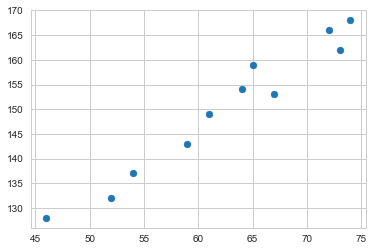

In [22]:
plt.scatter(X[:,1],X[:,0])
plt.show()

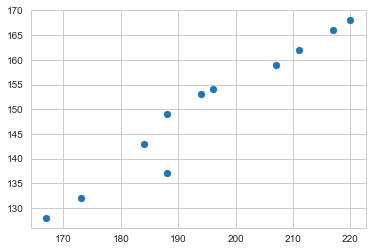

In [23]:
plt.scatter(X[:,2],X[:,0])
plt.show()

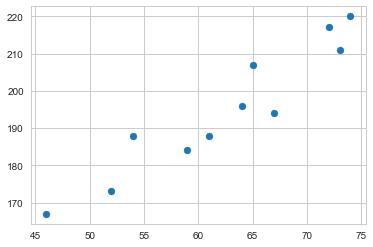

In [24]:
plt.scatter(X[:,1],X[:,2])
plt.show()

## Evaluating Model's Performance 

In [25]:
df['ones'] = 1
Y = df['X1']
X = df[['X2','X3','ones']]

In [32]:
X2only = df[['X2','ones']]
X3only = df[['X3','ones']]

In [33]:
def get_r2(X, Y):
    w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,Y))
    y_hat = np.dot(X,w)
    
    d1 = Y - y_hat
    d2 = Y - Y.mean()
    r2 = 1 - np.dot(d1,d1)/np.dot(d2,d2)
    return r2

In [34]:
print("r2 for x2 only: ", get_r2(X2only, Y))
print("r2 for x3 only: ", get_r2(X3only, Y))
print("r2 for both: ", get_r2(X, Y))

r2 for x2 only:  0.9578407208147355
r2 for x3 only:  0.9419952085293065
r2 for both:  0.9768471041502091
